In [7]:
import pandas as pd

# Load your data
trip_data = pd.read_excel('../data/Data_MNL_pagi.xlsx')  # Replace with your file path

# Check the frequency distribution of location_code
location_code_distribution = trip_data['location_code'].value_counts()

In [8]:
# Assuming you have the location_code_distribution from the previous step
location_code_distribution_df = location_code_distribution.reset_index()
location_code_distribution_df.columns = ['location_code', 'count']

location_code_distribution_df

,location_code,count
0,93,435
1,40,394
2,94,321
3,39,256
4,5,246
...,...,...
140,122,2
141,76,1
142,121,1
143,78,1


In [9]:
# Example: Saving DataFrame to a text file
location_code_distribution_df.to_csv('location_code_distribution.txt', index=False)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['location_code']
trip_data_updated = trip_data.drop(columns=variables_to_remove)

# Assuming trip_data is your DataFrame and excluding non-numeric columns
X = trip_data_updated.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature        VIF
0           bhv_app_map   5.608944
1               ind_age  19.674437
2        ind_fam_number  12.543876
3      ind_income_indiv   6.608287
4       bhv_online_hour  34.066557
5   bhv_longtime_driver  11.874245
6            loc_market   3.640234
7            loc_school   9.207702
8              loc_univ   3.675269
9          loc_bus_stop   3.644266
10          loc_station   1.211493
11         loc_terminal   4.195223
12           loc_hotels   6.331667
13             loc_mall   3.711816
14              loc_ofm  23.547269
15           loc_pickup  17.477852
16       loc_population  22.641635
17        loc_house_bld  16.372495
18            loc_parks   5.674243
19           loc_office   8.737935
20           loc_health   9.436878


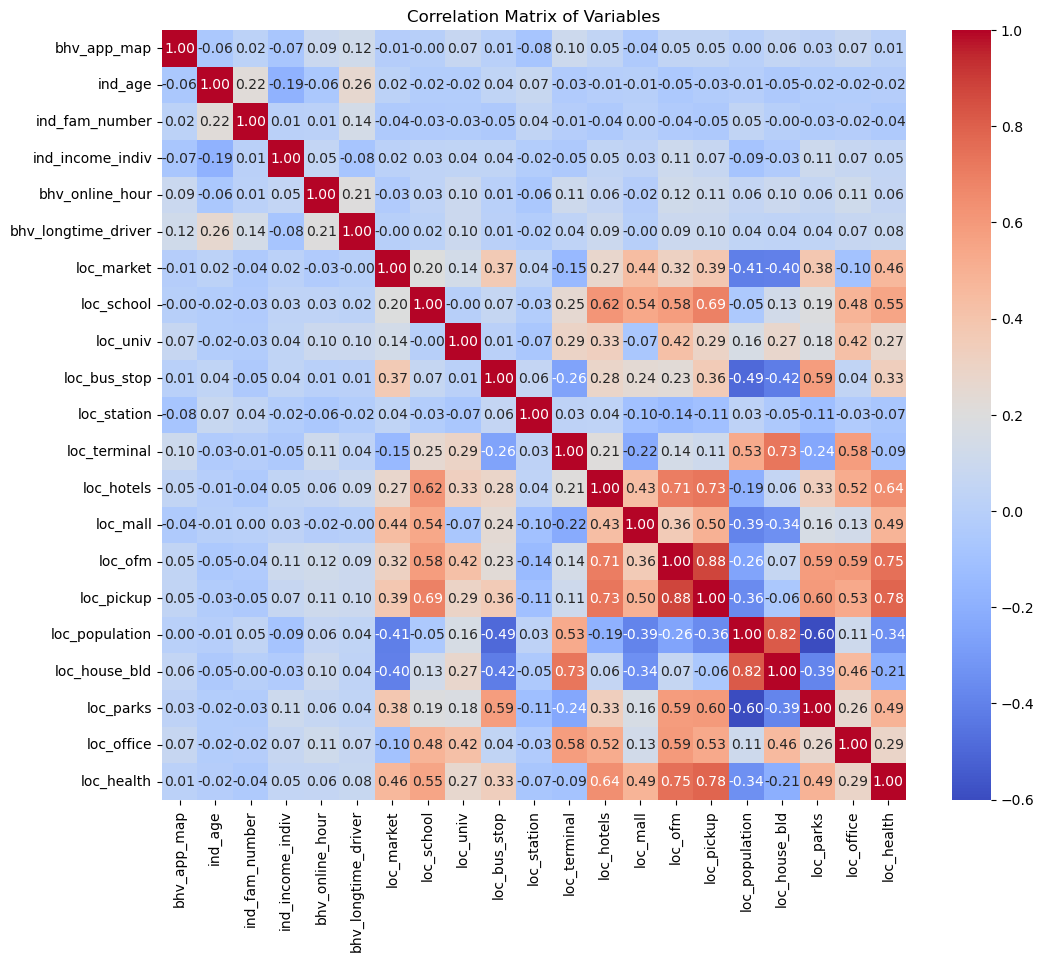

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trip_data is your DataFrame

# Selecting numeric columns for correlation analysis
numeric_data = trip_data_updated.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['bhv_longtime_driver', 
                       'loc_pickup', 
                       'location_code', 
                       'bhv_online_hour', 
                       'ind_income_indiv', 
                       'loc_population',
                       'loc_ofm']  # Replace with actual variables to remove
trip_data_updated = trip_data.drop(columns=variables_to_remove)

# Recalculate VIF
X = trip_data_updated.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

vif_data_updated = pd.DataFrame()
vif_data_updated['Feature'] = X.columns
vif_data_updated['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data_updated)

           Feature        VIF
0      bhv_app_map   4.923653
1          ind_age  13.368780
2   ind_fam_number  10.832525
3       loc_market   3.577383
4       loc_school   7.570830
5         loc_univ   3.350812
6     loc_bus_stop   3.237218
7      loc_station   1.194998
8     loc_terminal   3.895683
9       loc_hotels   5.626602
10        loc_mall   3.581037
11   loc_house_bld   6.848531
12       loc_parks   4.097791
13      loc_office   8.016435
14      loc_health   6.940774


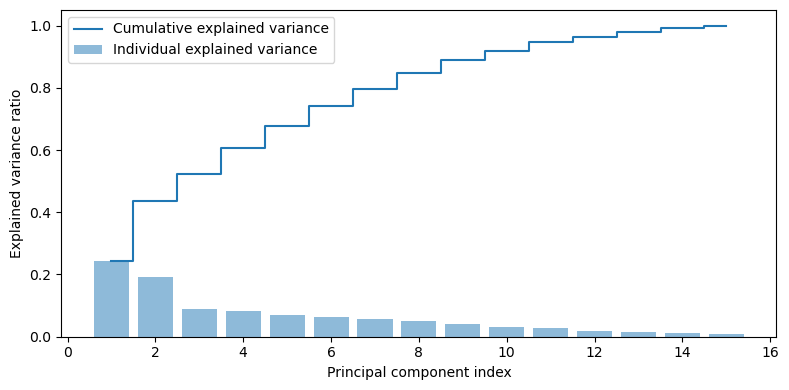

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your dataset after VIF filtering

# Apply PCA without reducing dimensionality to compute full explained variance
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance for each component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, 
        align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', 
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Decide the number of components (n) based on cumulative variance (e.g., 0.95)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts at 0

In [14]:
n_components

12

In [15]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

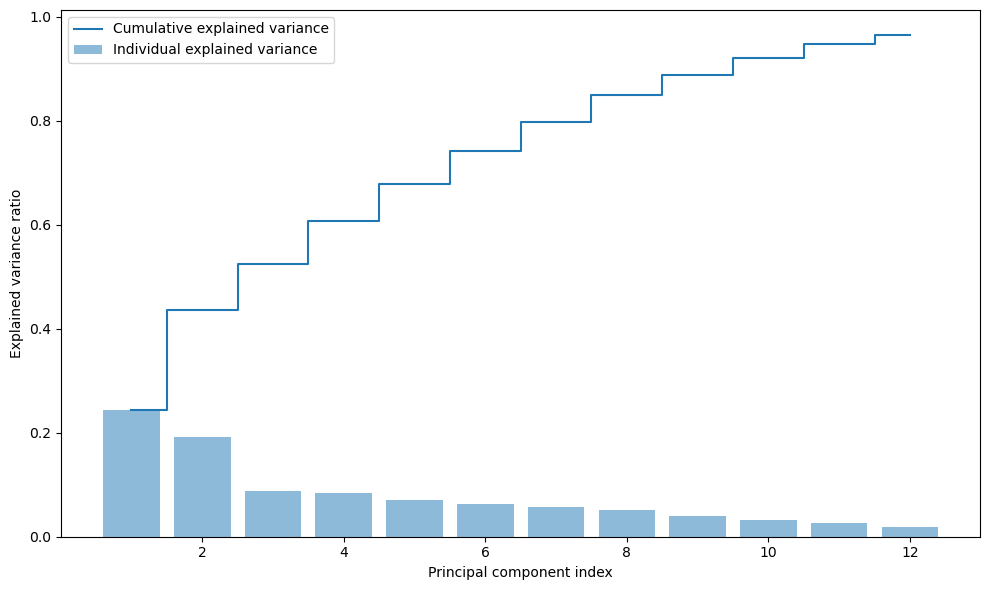

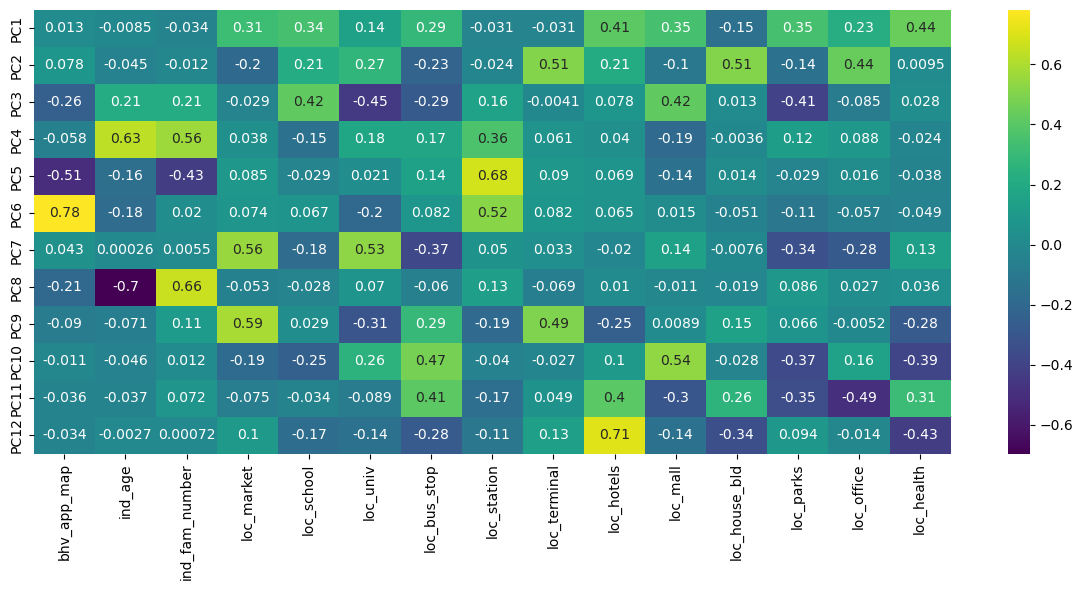

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming pca is your fitted PCA object and X_scaled is the scaled data
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plotting the Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.5, align='center', 
        label='Individual explained variance')
plt.step(range(1, len(cumulative_var) + 1), cumulative_var, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plotting the Heatmap of Component Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca.components_,
            cmap='viridis',
            yticklabels=["PC" + str(x) for x in range(1, len(explained_var) + 1)],
            xticklabels=list(X.columns),
            cbar=True,
            annot=True)
plt.tight_layout()
plt.show()

* loc_health
* loc_terminal
* loc_univ
* ind_age
* loc_station
* bhv_app_map
* loc_market
* loc_mall
* loc_office
* loc_hotels

In [20]:
# List of columns you want to keep
columns_to_keep = [
    'loc_health',
    'loc_terminal',
    'loc_univ',
    'ind_age',
    'loc_station',
    'bhv_app_map',
    'loc_market',
    'loc_mall',
    'loc_office',
    'loc_hotels',
    'location_code',
    'driver_id'
    ]

# Selecting the columns
trip_data_updated = trip_data[columns_to_keep]

In [21]:
from sklearn.model_selection import train_test_split

X = trip_data_updated.drop(['driver_id','location_code'], axis=1)  # Features
y = trip_data_updated['location_code']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
trip_data_updated.columns

Index(['driver_id', 'bhv_app_map', 'ind_age', 'ind_fam_number',
       'bhv_other_platform', 'loc_market', 'loc_school', 'loc_univ',
       'loc_bus_stop', 'loc_station', 'loc_terminal', 'loc_hotels', 'loc_mall',
       'loc_house_bld', 'loc_parks', 'loc_office', 'trip_order_Food',
       'trip_order_delivery', 'trip_order_Ride', 'loc_health',
       'location_code'],
      dtype='object')

In [28]:
# Choose a threshold for minimum number of samples per class
# This threshold is just an example, and should be adjusted based on specific needs
threshold = 10  # For instance, any class with less than 50 samples will be removed

# Identify classes below the threshold
small_classes = y_train.value_counts()[y_train.value_counts() < threshold]
small_classes_list = small_classes.index.tolist()

# Filter out these classes from the dataset
filtered_data = trip_data_updated[~trip_data_updated['location_code'].isin(small_classes_list)]

# Show the impact of this filtering
original_shape = trip_data_updated.shape
filtered_shape = filtered_data.shape
removed_classes_count = len(small_classes_list)

original_shape, filtered_shape, removed_classes_count

((5560, 12), (5349, 12), 36)

In [23]:
filtered_data

,loc_health,loc_terminal,loc_univ,ind_age,loc_station,bhv_app_map,loc_market,loc_mall,loc_office,loc_hotels,location_code,driver_id
0,2,0,0,34,0,3,1,1,6,5,145,ikialink8@gmail.com
6,2,2,3,34,0,3,0,0,28,17,93,ikialink8@gmail.com
8,4,0,5,34,0,3,2,0,1,15,41,ikialink8@gmail.com
10,4,0,5,34,0,3,2,0,1,15,41,ikialink8@gmail.com
11,4,0,5,34,0,3,2,0,1,15,41,ikialink8@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...
5525,1,0,0,47,0,1,0,0,3,1,71,82120934250.0
5531,1,0,0,47,0,1,0,0,3,1,71,82120934250.0
5532,6,0,1,47,0,1,1,1,18,21,40,82120934250.0
5542,1,0,0,47,0,1,0,0,3,1,71,82120934250.0


In [29]:
from imblearn.over_sampling import SMOTE
# Split the filtered dataset into training and test sets
X_filtered = filtered_data.drop(['driver_id','location_code'], axis=1)
y_filtered = filtered_data['location_code']


# Split the dataset
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Check the new class distribution
new_distribution_filtered = y_train_smote.value_counts()

new_distribution_filtered.head(), new_distribution_filtered.tail()  # Display the head and tail of the new distribution

(location_code
 97     334
 29     334
 87     334
 113    334
 32     334
 Name: count, dtype: int64,
 location_code
 26     334
 125    334
 60     334
 81     334
 55     334
 Name: count, dtype: int64)

In [30]:
y_train_smote

0         97
1        140
2         41
3        108
4        111
        ... 
35733    146
35734    146
35735    146
35736    146
35737    146
Name: location_code, Length: 35738, dtype: int64

In [31]:
X_train_smote

,loc_health,loc_terminal,loc_univ,ind_age,loc_station,bhv_app_map,loc_market,loc_mall,loc_office,loc_hotels
0,1,0,1,37,0,2,0,0,2,2
1,1,1,1,33,0,2,0,0,3,15
2,4,0,5,33,0,3,2,0,1,15
3,0,0,2,44,0,1,0,0,4,4
4,1,0,4,30,0,1,0,0,15,14
...,...,...,...,...,...,...,...,...,...,...
35733,0,0,2,53,0,2,0,0,12,6
35734,0,0,2,35,0,2,0,0,12,6
35735,0,0,2,50,0,1,0,0,12,6
35736,0,0,2,34,0,2,0,0,12,6


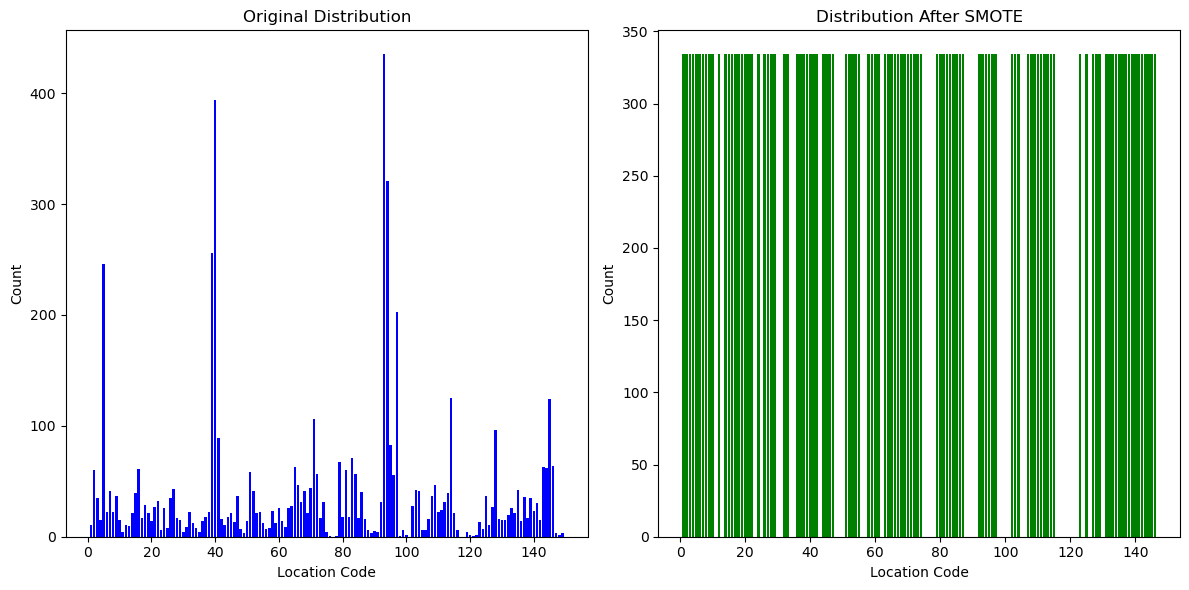

In [32]:
import matplotlib.pyplot as plt

# Assuming 'original_distribution' and 'smote_distribution' are Series with location_code counts
original_distribution = trip_data['location_code'].value_counts()
smote_distribution = y_train_smote.value_counts()  # After SMOTE

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Original Distribution
axes[0].bar(original_distribution.index, original_distribution.values, color='blue')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Location Code')
axes[0].set_ylabel('Count')

# Distribution After SMOTE
axes[1].bar(smote_distribution.index, smote_distribution.values, color='green')
axes[1].set_title('Distribution After SMOTE')
axes[1].set_xlabel('Location Code')
axes[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [33]:
import statsmodels.api as sm

# Assuming X_train_smote and y_train_smote are your training data after applying SMOTE
X_train_sm = sm.add_constant(X_train_smote)  # Adding a constant for the intercept
model = sm.MNLogit(y_train_smote, X_train_sm)
result = model.fit()

# Model summary
print(result.summary())

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:          location_code   No. Observations:                35738
Model:                        MNLogit   Df Residuals:                    34572
Method:                           MLE   Df Model:                         1060
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                     nan
Time:                        10:29:15   Log-Likelihood:                    nan
converged:                       True   LL-Null:                   -1.6700e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
  location_code=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        nan        nan        nan         nan         nan
loc_health   